In [1]:
import json
import matplotlib.pyplot as plt
import urllib.request as url
import pandas as pd

In [2]:
req = url.urlopen("https://api.covid19india.org/states_daily.json")

In [3]:
data = json.load(req)

In [4]:
states = pd.DataFrame(data['states_daily'])

In [5]:
states.shape

(1062, 42)

In [6]:
states.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Recovered,1,0,0,4,0,0,0,0


In [8]:
states['date'] = pd.to_datetime(states['date'])

In [11]:
states['dl'] = states['dl'].astype('int32')
states['mh'] = states['mh'].astype('int32')
states['up'] = states['up'].astype('int32')
states['tt'] = states['tt'].astype('int32')

In [12]:
confirmed = states[states['status'] == 'Confirmed']
recovered = states[states['status'] == 'Recovered']
deceased = states[states['status'] == 'Deceased']

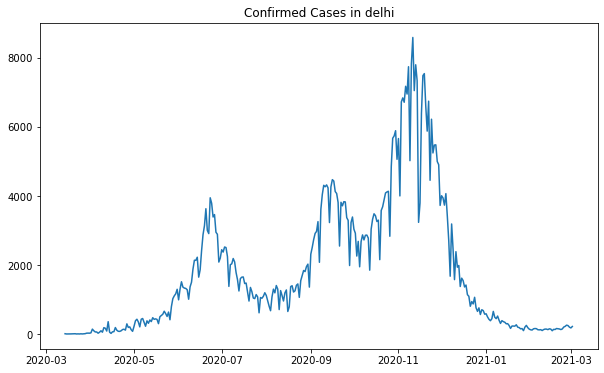

In [16]:
plt.figure(figsize=(10,6))
plt.plot(confirmed['date'], confirmed['dl'])
plt.title("Confirmed Cases in delhi")
plt.show()

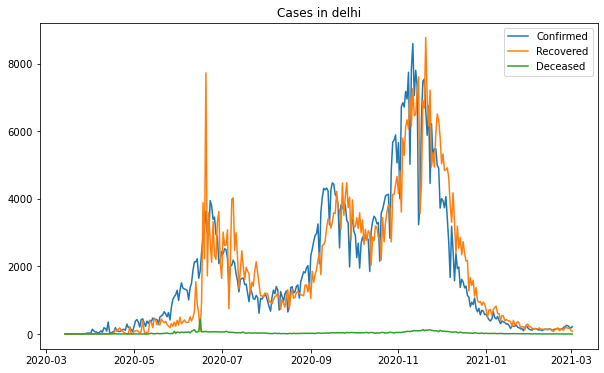

In [18]:
plt.figure(figsize=(10,6))
plt.plot(confirmed['date'], confirmed['dl'], label='Confirmed')
plt.plot(confirmed['date'], recovered['dl'], label='Recovered')
plt.plot(confirmed['date'], deceased['dl'], label='Deceased')
plt.title("Cases in delhi")
plt.legend()
plt.show()

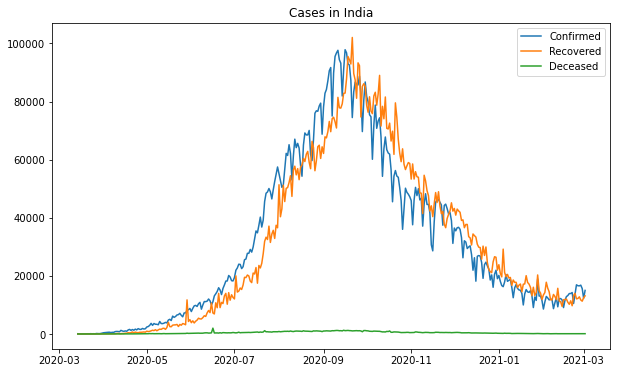

In [20]:
plt.figure(figsize=(10,6))
plt.plot(confirmed['date'], confirmed['tt'], label='Confirmed')
plt.plot(confirmed['date'], recovered['tt'], label='Recovered')
plt.plot(confirmed['date'], deceased['tt'], label='Deceased')
plt.title("Cases in India")
plt.legend()
plt.show()

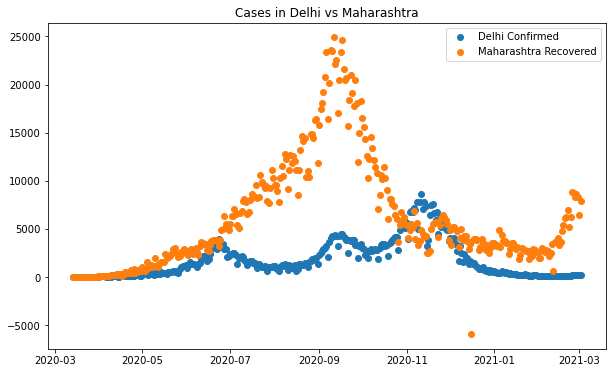

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(confirmed['date'], confirmed['dl'], label='Delhi Confirmed')
plt.scatter(confirmed['date'], confirmed['mh'], label='Maharashtra Recovered')
plt.title("Cases in Delhi vs Maharashtra")
plt.legend()
plt.show()